## Polynomial Regression

In [ ]:
from google.colab import drive
drive.mount('/content/drive')0

Mounted at /content/drive


In [ ]:
# Import neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

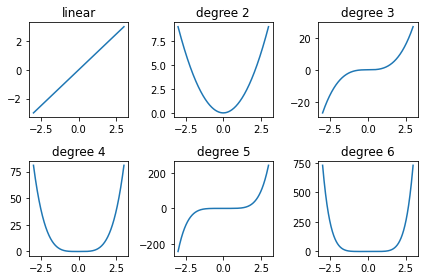

In [ ]:
x = np.linspace(-3,3,1000) # 1000 sample number between -3 to 3
# Plot subplots
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)
ax1.plot(x, x)
ax1.set_title('linear')
ax2.plot(x, x**2)
ax2.set_title('degree 2')
ax3.plot(x, x**3)
ax3.set_title('degree 3')
ax4.plot(x, x**4)
ax4.set_title('degree 4')
ax5.plot(x, x**5)
ax5.set_title('degree 5')
ax6.plot(x, x**6)
ax6.set_title('degree 6')
plt.tight_layout()# tidy layout

### Polynomial Regression Example

Let’s consider another set of students’ average test grade scores and their respective
average studied hours for similar IQ students

    Hours_Studied  Test_Grade
0             0.5          20
1             1.0          21
2             2.0          22
3             3.0          23
4             4.0          25
5             5.0          37
6             6.0          48
7             7.0          56
8             8.0          67
9             9.0          76
10           10.0          90
11           11.0          89
12           12.0          90
Correlation Matrix: 
               Hours_Studied  Test_Grade
Hours_Studied       1.000000    0.974868
Test_Grade          0.974868    1.000000
R Squared:  0.9503677766997879


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


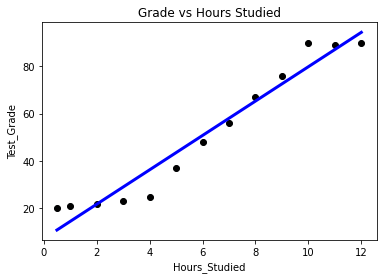

In [ ]:
# importing linear regression function
import sklearn.linear_model as lm
from sklearn.metrics import r2_score , mean_absolute_error, mean_squared_error

# Load data
df = pd.read_csv('/content/drive/MyDrive/Machine Learning Specialization Script Files/Datasets/Grade_Set_2.csv')
print(df)

# Simple scatter plot
df.plot(kind='scatter', x='Hours_Studied', y='Test_Grade', title='Grade vs Hours Studied')
# check the correlation between variables
print("Correlation Matrix: ")
print(df.corr())


# Create linear regression object
lr = lm.LinearRegression()
x= df.Hours_Studied[:, np.newaxis] # independent variable: The np.newaxis allows us to increase the dimensions of an array by adding new axis
y= df.Test_Grade # dependent variable

# Train the model using the training sets
lr.fit(x, y)


# plotting fitted line
plt.scatter(x, y, color='black')
plt.plot(x, lr.predict(x), color='blue', linewidth=3)
plt.title('Grade vs Hours Studied')
plt.ylabel('Test_Grade')
plt.xlabel('Hours_Studied')
print("R Squared: ", r2_score(y, lr.predict(x)))

This is not a perfect linear
relationship, although we can fit a linear line. Let’s try higher order polynomial degrees

## R-Squared for Different Polynomial Degrees


R-squared for degree 1 =  0.9503677766997879
R-squared for degree 2 =  0.9608726568678714
R-squared for degree 3 =  0.9938323120374665
R-squared for degree 4 =  0.9955000184096712
R-squared for degree 5 =  0.9956204913897357


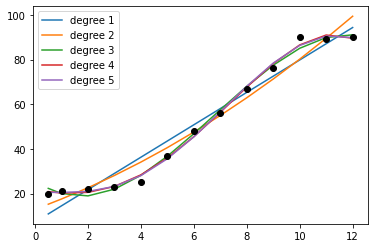

In [ ]:
lr = lm.LinearRegression()
x= df.Hours_Studied # independent variable
y= df.Test_Grade # dependent variable


# NumPy's vander function will return powers of the input vector
for deg in [1, 2, 3, 4, 5]:
 lr.fit(np.vander(x, deg + 1), y);
 y_lr = lr.predict(np.vander(x, deg + 1))
 plt.plot(x, y_lr, label='degree ' + str(deg));
 plt.legend(loc=2);
 print("R-squared for degree " + str(deg) + " = ", r2_score(y, y_lr))
plt.plot(x, y, 'ok')

Scikit-learn provides a function to generate a new feature matrix consisting of all
polynomial combinations of the features with a degree less than or equal to the specified
degree

R Squared using built-in function:  0.9938323120374665


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  after removing the cwd from sys.path.


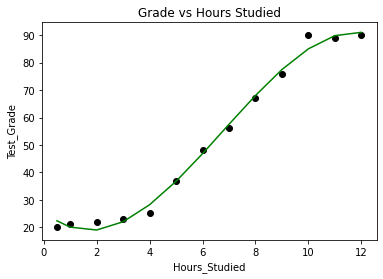

In [ ]:
# Scikit-learn Polynomial Features
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
x= df.Hours_Studied[:, np.newaxis] # independent variable
y= df.Test_Grade # dependent variable
degree = 3
model = make_pipeline(PolynomialFeatures(degree), lr)
model.fit(x, y)
plt.scatter(x, y, color='black')
plt.plot(x, model.predict(x), color='green')
plt.title('Grade vs Hours Studied')
plt.ylabel('Test_Grade')
plt.xlabel('Hours_Studied')
print("R Squared using built-in function: ", r2_score(y, model.predict(x)))

# Multivariate Analysis

We’ll be using the housing dataset below which contains sales
prices of houses in the city of Windsor. Below is the brief description of each variable.


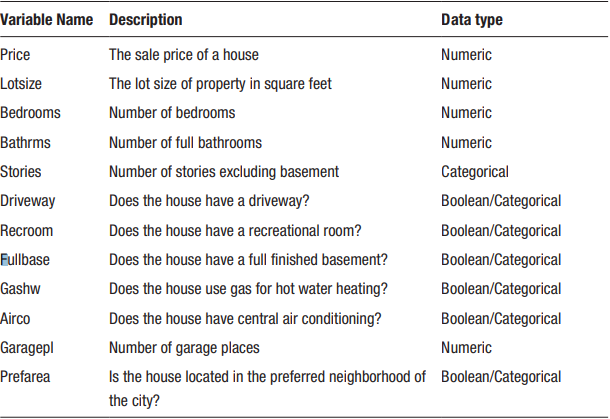







Let’s build a model to predict the house price (dependent variable) by considering
the rest of the variables as independent variables.

In [ ]:
# Load data
df = pd.read_csv('/content/drive/MyDrive/Machine Learning Specialization Script Files/Datasets/Housing_Modified.csv')
df.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000.0,5850,3,1,two,yes,no,yes,no,no,1,no
1,38500.0,4000,2,1,one,yes,no,no,no,no,0,no
2,49500.0,3060,3,1,one,yes,no,no,no,no,0,no
3,60500.0,6650,3,1,two,yes,yes,no,no,no,0,no
4,61000.0,6360,2,1,one,yes,no,no,no,no,0,no


In [ ]:
df["price"].describe()

count       546.000000
mean      68121.597070
std       26702.670926
min       25000.000000
25%       49125.000000
50%       62000.000000
75%       82000.000000
max      190000.000000
Name: price, dtype: float64

In [ ]:
df.bedrooms.unique()

array([3, 2, 4, 1, 5, 6])

In [ ]:
# # to determine binary variables in our dataframe
# df.select_dtypes("object").nunique() == 2

## Multicollinearity and Variation Inflation Factor


In [ ]:
# Multicollinearity and VIF
from sklearn.preprocessing import LabelBinarizer
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Convert binary fields to numeric boolean fields
lb = LabelBinarizer()
df.driveway = lb.fit_transform(df.driveway)
df.recroom = lb.fit_transform(df.recroom)
df.fullbase = lb.fit_transform(df.fullbase)
df.gashw = lb.fit_transform(df.gashw)
df.airco = lb.fit_transform(df.airco)
df.prefarea = lb.fit_transform(df.prefarea)

# Create dummy variables for stories
df_stories = pd.get_dummies(df['stories'], prefix='stories', drop_first= True)

# Join the dummy variables to the main dataframe
df = pd.concat([df, df_stories], axis=1)
del df['stories']

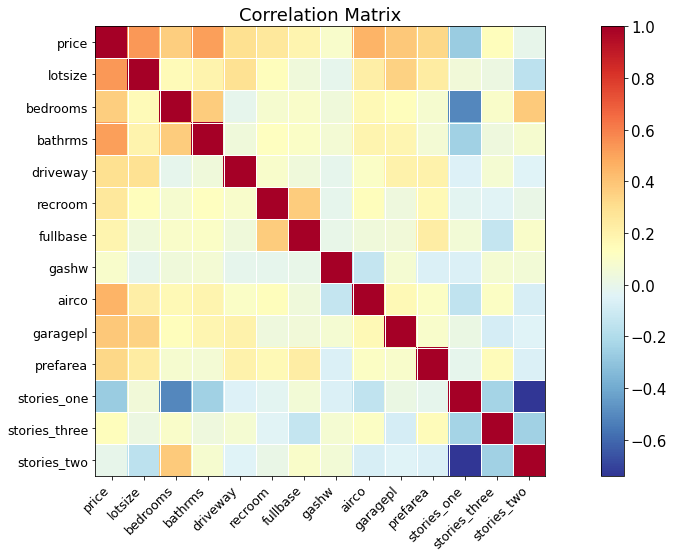

In [ ]:
# lets plot the correlation matrix using statmodels graphics packages'
#plot_corr

# create correlation matrix
corr = df.corr()
#font = {"size": 12}
plt.rc("font", size = 15)
plt.rc("figure", figsize=(16,8))
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

We can see from the plot that stories_one has a strong negative correlation with
stories_two. Let’s perform the VIF analysis to eliminate strongly correlated independent
variables

In [ ]:
df_stories

,stories_one,stories_three,stories_two
0,0,0,1
1,1,0,0
2,1,0,0
3,0,0,1
4,1,0,0
...,...,...,...
541,0,0,0
542,0,0,0
543,0,0,0
544,0,0,1


In [ ]:
# Remove Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor, OLSInfluence

# create a Python list of feature names
independent_variables = ['lotsize', 'bedrooms', 'bathrms','driveway', 'recroom',
 'fullbase','gashw','airco','garagepl', 'prefarea',
 'stories_one','stories_two','stories_three']

# use the list to select a subset from original DataFrame
X = df[independent_variables]
y = df['price']
thresh = 10
for i in np.arange(0,len(independent_variables)):
  vif = [variance_inflation_factor(X[independent_variables].values, x) for x in range(X[independent_variables].shape[1])]

  maxloc = vif.index(max(vif))
  if max(vif) > thresh:
    print("vif :", vif)
    print ('\n')
    print('dropping ' + X[independent_variables].columns[maxloc] +' ' + 'At Index:' + str(maxloc))
    del independent_variables[maxloc]
  else:
    break
print('Final variables:', independent_variables)


vif : [8.958098087844336, 18.469878559519948, 8.984672347290864, 7.08857854209188, 1.477015281503392, 2.013320236472385, 1.1034879198994194, 1.756746206560902, 1.9826489313438442, 1.5332946465459893, 3.965752674786861, 5.511702408354892, 1.7700402770614867]


dropping bedrooms At Index:1
Final variables: ['lotsize', 'bathrms', 'driveway', 'recroom', 'fullbase', 'gashw', 'airco', 'garagepl', 'prefarea', 'stories_one', 'stories_two', 'stories_three']


In [ ]:
X[independent_variables]

array([[5850,    1,    1, ...,    0,    1,    0],
       [4000,    1,    1, ...,    1,    0,    0],
       [3060,    1,    1, ...,    1,    0,    0],
       ...,
       [6000,    2,    1, ...,    0,    0,    0],
       [6000,    2,    1, ...,    0,    1,    0],
       [6000,    1,    1, ...,    0,    1,    0]])

In [ ]:
 range(X[independent_variables].shape[1])

range(0, 12)

In [ ]:
list(range(10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [ ]:
[x*2 for x in range(10)]

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]

In [ ]:
# Build the Multivariate Linear Regression Model
from sklearn.model_selection import train_test_split
from sklearn import metrics

# create a Python list of feature names
independent_variables = ['lotsize', 'bathrms','driveway', 'recroom',
 'fullbase','gashw','airco','garagepl', 'prefarea',
 'stories_one','stories_two','stories_three']


# use the list to select a subset from original DataFrame
X = df[independent_variables]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.80, random_state=1)

# create a fitted model
lm = sm.OLS(y_train, X_train).fit()

# print the summary
print(lm.summary())

# make predictions on the testing set
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)

y_pred = lm.predict(X) # full data

# evaluation train set
print("Train MAE: ", metrics.mean_absolute_error(y_train, y_train_pred))
print("Train RMSE: ", np.sqrt(metrics.mean_squared_error(y_train,y_train_pred)))

# test set
print("Test MAE: ", metrics.mean_absolute_error(y_test, y_test_pred))
print("Test RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.954
Model:                            OLS   Adj. R-squared (uncentered):              0.953
Method:                 Least Squares   F-statistic:                              731.3
Date:                Tue, 26 Jul 2022   Prob (F-statistic):                   1.46e-274
Time:                        10:09:35   Log-Likelihood:                         -4828.1
No. Observations:                 436   AIC:                                      9680.
Df Residuals:                     424   BIC:                                      9729.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [ ]:
# Build the Multivariate Linear Regression Model without stories_two and recrom
from sklearn.model_selection import train_test_split
from sklearn import metrics

# create a Python list of feature names
independent_variables = ['lotsize', 'bathrms','driveway',
 'fullbase','gashw','airco','garagepl', 'prefarea',
 'stories_one','stories_three']


# use the list to select a subset from original DataFrame
X = df[independent_variables]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.80, random_state=1)

# create a fitted model
lm = sm.OLS(y_train, X_train).fit()

# print the summary
print(lm.summary())

# make predictions on the testing set
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)

y_pred = lm.predict(X) # full data

# evaluation train set
print("Train MAE: ", metrics.mean_absolute_error(y_train, y_train_pred))
print("Train RMSE: ", np.sqrt(metrics.mean_squared_error(y_train,y_train_pred)))

# test set
print("Test MAE: ", metrics.mean_absolute_error(y_test, y_test_pred))
print("Test RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.954
Model:                            OLS   Adj. R-squared (uncentered):              0.953
Method:                 Least Squares   F-statistic:                              876.8
Date:                Tue, 26 Jul 2022   Prob (F-statistic):                   5.12e-277
Time:                        10:11:10   Log-Likelihood:                         -4829.2
No. Observations:                 436   AIC:                                      9678.
Df Residuals:                     426   BIC:                                      9719.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

Hypothesis testing is an assertion regarding the distribution of the observations and
validating this assertion. The hypothesis testing steps are as follows:
- A hypothesis is made.
- The validity of the hypothesis is tested.
- If the hypothesis is found to be true, it is accepted.
- If it is found to be untrue, it is rejected
- The hypothesis that is being tested for possible rejection is called the
null hypothesis.

- The null hypothesis is denoted by H0.
- The hypothesis that is accepted when the null hypothesis is rejected
is called an alternate hypothesis Ha.
- The alternative hypothesis is often the interesting one and often the
one that someone sets out to prove.
- For example, null hypothesis H0 is that the lot size has a real effect
on house price; in this case, the coefficient m is equal to zero in the
regression equation (y = m ∗ lot size + c).
- Alternative hypothesis Ha is that the lot size does not have a real
effect on house price, and the effect you saw was due to chance,
which means the coefficient m is not equal to zero in the regression
equation.


The process of testing a hypothesis indicates that there is a possibility
of making an error. There are two types of errors for any given data
set, and these two types of errors are inversely related, which means
the smaller the risk of one, the higher the risk of the other.
- Type I error: The error of rejecting the null hypothesis H0 even
though H0 was true
- Type II error: The error of accepting the null hypothesis H0 even
though H0 was false

# Regression Diagnostics: Outliers

There are a set of procedures and assumptions that need to be verified about our model
results, otherwise the model could be misleading.

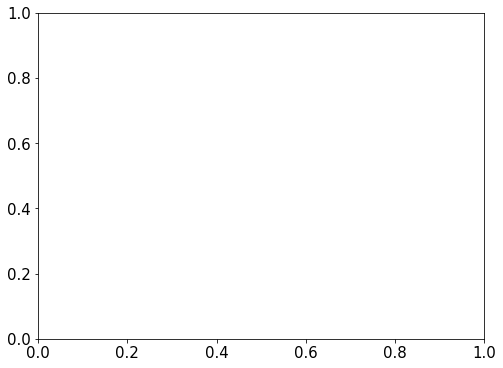

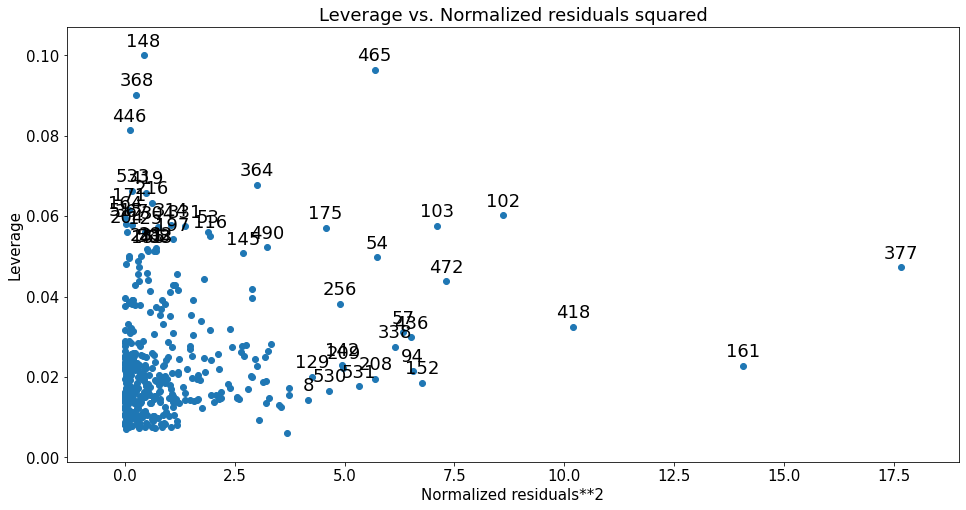

In [ ]:
# Plot the Normalized Residual vs. Leverage
# lets plot the normalized residual vs leverage
from statsmodels.graphics.regressionplots import plot_leverage_resid2
ax = plt.subplots(figsize=(8,6))
plot_leverage_resid2(lm, ax = ax)
plt.show()

###  Find outliers 

Data points that are far away from the fitted regression line are called outliers


In [ ]:
# Find outliers 
# Bonferroni outlier test
test = lm.outlier_test()
print('Bad data points (bonf(p) < 0.05):')
print(test[test['bonf(p)'] < 0.05])

Bad data points (bonf(p) < 0.05):
     student_resid   unadj_p   bonf(p)
377       4.387449  0.000014  0.006315


### Homoscedasticity and Normality

The error variance should be constant, which is known as homoscedasticity, and the error should be normally distributed

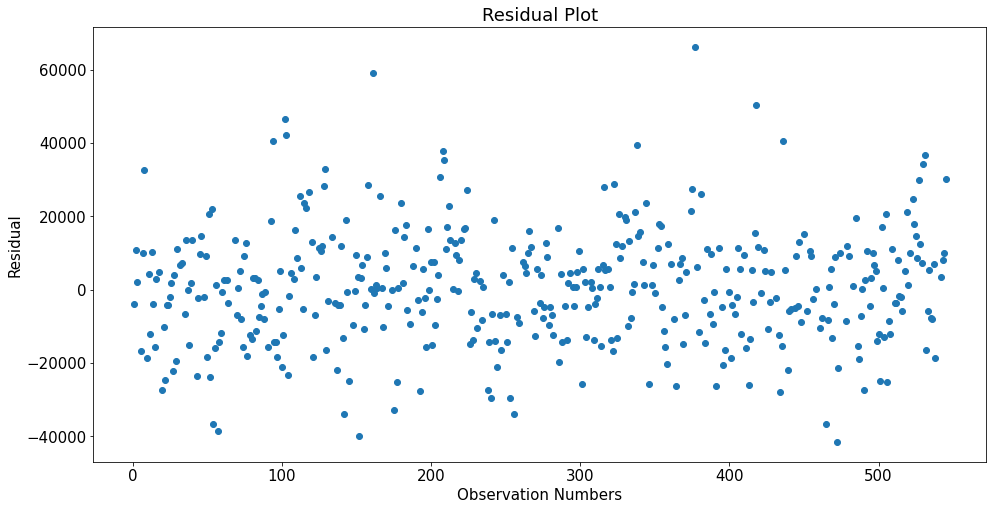

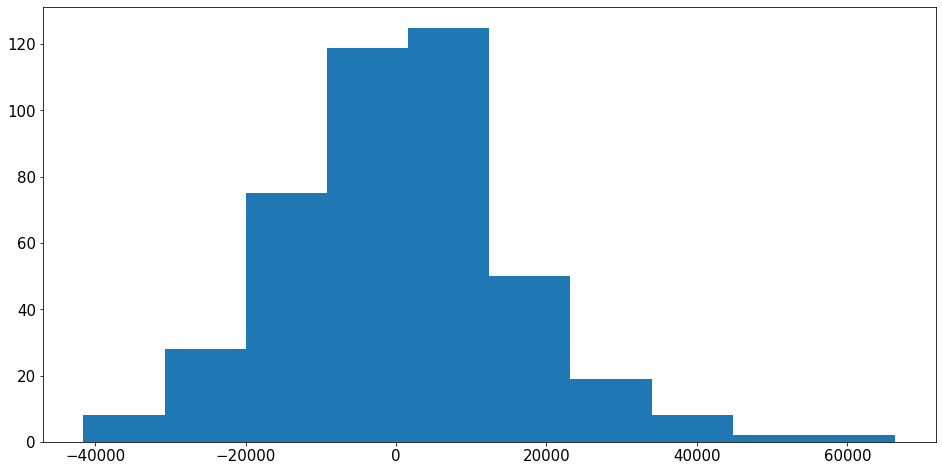

In [ ]:
# Homoscedasticity Test
# plot to check homoscedasticity
plt.plot(lm.resid,'o')
plt.title('Residual Plot')
plt.ylabel('Residual')
plt.xlabel('Observation Numbers')
plt.show()
plt.hist(lm.resid);


### Linearity Check


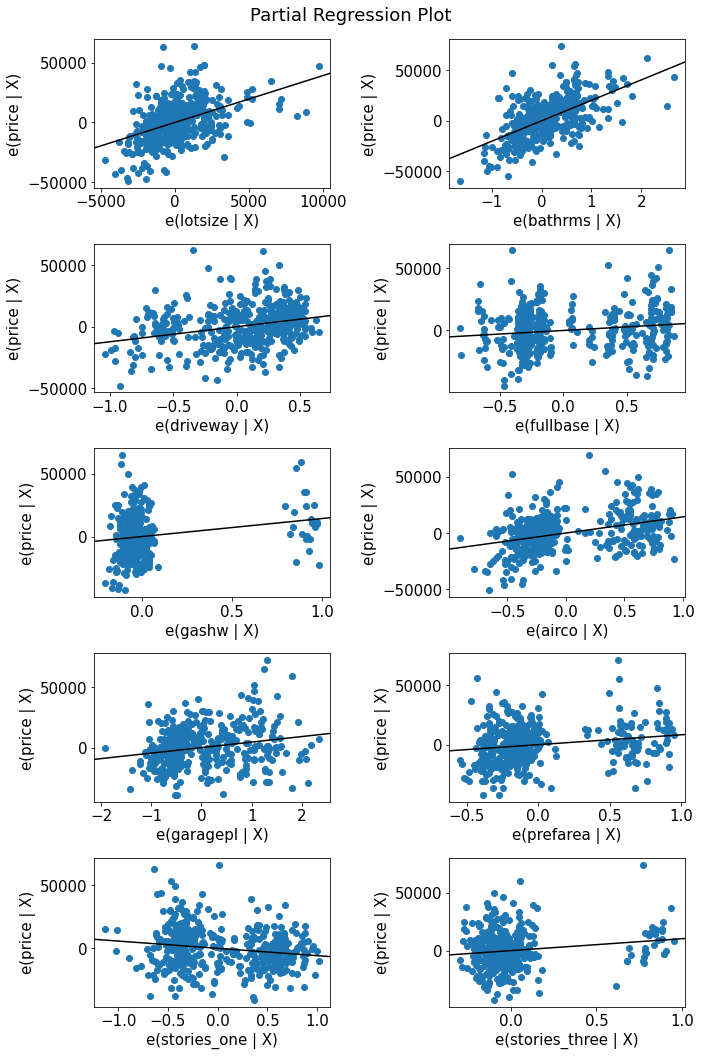

In [ ]:
# linearity plots
fig = plt.figure(figsize=(10,15))
fig = sm.graphics.plot_partregress_grid(lm, fig=fig)

## Overfitting and Underfitting
Underfitting occurs when the model does not fit the data well and is unable to capture the underlying trend in it. In this case, we can notice a low accuracy in training and test data set.
Conversely, overfitting occurs when the model fits the data too well, capturing all the noises

### Regularization

With the increase in a number of variables and the increase in model complexity, the probability of overfitting also increases.

LASSO: This provides a sparse solution, also known as L1 regularization. It guides
parameter value to be zero (i.e., the coefficients of the variables that add minor value
to the model will be zero), and adds a penalty equivalent to the absolute value of the
magnitude of coefficients.
Ridge regression: Also known as Tikhonov (L2) regularization, it guides parameters
to be close to zero but not zero.


Ridge regression will apply a
penalty to reduce the magnitude of the coefficient of all variables that add minor value
to the model accuracy, adding penalty equivalent to the square of the magnitude of
coefficients

In [ ]:
from sklearn import linear_model

# Load data
df = pd.read_csv('/content/drive/MyDrive/Machine Learning Specialization Script Files/Datasets/Grade_Set_2.csv')
df.columns = ['x','y']

for i in range(2,50): # power of 1 is already there
 colname = 'x_%d'%i # new var will be x_power
 df[colname] = df['x']**i
independent_variables = list(df.columns)
independent_variables.remove('y')

X= df[independent_variables] # independent variable
y= df.y # dependent variable
# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.80,
random_state=1)

# Ridge regression
lr = linear_model.Ridge(alpha=0.001)
lr.fit(X_train, y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)
print("------ Ridge Regression ------")
print("Train MAE: ", metrics.mean_absolute_error(y_train, y_train_pred))
print("Train RMSE: ", np.sqrt(metrics.mean_squared_error(y_train,
y_train_pred)))
print("Test MAE: ", metrics.mean_absolute_error(y_test, y_test_pred))
print("Test RMSE: ", np.sqrt(metrics.mean_squared_error(y_test,
y_test_pred)))
print("Ridge Coef: ", lr.coef_)


# LASSO regression
lr = linear_model.Lasso(alpha=0.001)
lr.fit(X_train, y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)
print("----- LASSO Regression -----")
print("Train MAE: ", metrics.mean_absolute_error(y_train, y_train_pred))
print("Train RMSE: ", np.sqrt(metrics.mean_squared_error(y_train,
y_train_pred)))
print("Test MAE: ", metrics.mean_absolute_error(y_test, y_test_pred))
print("Test RMSE: ", np.sqrt(metrics.mean_squared_error(y_test,
y_test_pred)))
print("LASSO Coef: ", lr.coef_)

------ Ridge Regression ------
Train MAE:  13.23303648873574
Train RMSE:  16.87259547067167
Test MAE:  21.973745021751768
Test RMSE:  22.009112336405487
Ridge Coef:  [ 8.67127091e-89  1.13658541e-87  1.29054357e-86  1.39193904e-85
  1.46163224e-84  1.51065504e-83  1.54557648e-82  1.57047809e-81
  1.58797156e-80  1.59977083e-79  1.60702465e-78  1.61051501e-77
  1.61077848e-76  1.60818239e-75  1.60297372e-74  1.59531134e-73
  1.58528767e-72  1.57294361e-71  1.55827906e-70  1.54126043e-69
  1.52182627e-68  1.49989158e-67  1.47535130e-66  1.44808334e-65
  1.41795140e-64  1.38480789e-63  1.34849705e-62  1.30885857e-61
  1.26573196e-60  1.21896180e-59  1.16840429e-58  1.11393537e-57
  1.05546076e-56  9.92928513e-56  9.26344513e-55  8.55791671e-54
  7.81453618e-53  7.03643862e-52  6.22841607e-51  5.39735647e-50
  4.55278070e-49  3.70749814e-48  2.87840597e-47  2.08746206e-46
  1.36286766e-45  7.40503400e-45  2.65671003e-44 -4.79631528e-45
  2.10847992e-46]
----- LASSO Regression -----
Train M

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:197: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  "Singular matrix in solving dual problem. Using "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.448e+00, tolerance: 6.752e-01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


### Nonlinear Regression


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%matplotlib inline
y = np.array([1.0, 1.5, 2.4, 2, 1.49, 1.2, 1.3, 1.2, 0.5])

# Function for non-liear curve fitting
def func(x, p1,p2):
  return p1*np.sin(p2*x) + p2*np.cos(p1*x)

func()

TypeError: ignored

In [ ]:
popt, pcov = curve_fit(func, x, y,p0=(1.0,0.2))
p1 = popt[0]
p2 = popt[1]
residuals = y - func(x,p1,p2)
fres = sum(residuals**2)
curvex=np.linspace(-2,3,100)
curvey=func(curvex,p1,p2)
plt.plot(x,y,'bo ')
plt.plot(curvex,curvey,'r')
plt.title('Non-linear fitting')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['data','fit'],loc='best')
plt.show()

ValueError: ignored

error: ignored